In [28]:
from allthethings import PyNetwork, PyPipe_ps
from allthethings import PyBC_opt_dh
import numpy as np
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [54]:
fi = "indata/waterhammer.inp"
fc = "indata/waterhammer.config"
mtype = 1
n1 = PyNetwork(fi,fc,mtype)
M = n1.M
N = n1.Ns[0]
L = n1.Ls[0]
a = n1.a[0]
T1 =n1.T
D = n1.Ds[0]
p1 = PyPipe_ps(N, D, L, M, a)
dt = T1/M


In [55]:
n1.runForwardProblem(dt)

In [56]:
q = n1.q(0)
h = n1.getHofA(0)
qhist = n1.qhist(0)

In [57]:
def idx_t(i,j,n):
    return (2*(N+2)*n+(N+2)*i+j)

0.600025462176
Af =0.196350 
dH/dV = 122.448959
a/g = 122.448980
||dH/dV-a/g || = 0.000020


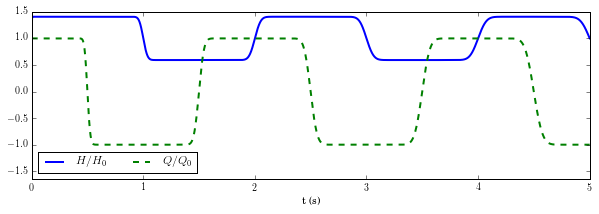

In [75]:

T1 = n1.T
t = linspace(0,T1, M+1)
n7 = 599
#A0 = 150
#A0 = p1.AofH(150,True)
A0 = qhist[idx_t(0,n7,0)]
H0 = p1.Eta(A0,True)/A0;
Q0 = qhist[idx_t(1,n7,0)]
g = 9.8
#A = [p1.HofA(qhist[idx_t(0,n7,n)], True)/(A0) for n in range(M+1)]
H = [p1.Eta(qhist[idx_t(0,n7,n)], True)/(Af*H0) for n in range(M+1)]
Q = [qhist[idx_t(1,0,n)]/Q0 for n in range(M+1)]
Q2 = [qhist[idx_t(1,5,n)] for n in range(M+1)]
#P0 = [p1.HofA(qhist[idx_t(0,0,n)], False) for n in range(M+1)]

rc('text', usetex=True)        #for tex rendering. 
rc('font', family='serif')     #for pretty font 
print dt/n1.Ls[0]*n1.Ns[0]*n1.cmax[0]
fig = plt.figure(figsize=(10,3))
ax = fig.add_subplot(111)
Af =.25**2*np.pi
print "Af =%f "%Af
dH = (max(H)-min(H[0:-2]))*H0/g
dV = 2*Q0/Af
print "dH/dV = %f" %(dH/dV)
print "a/g = %f" %(a/9.8)
ax.plot(t,H,linewidth=2)
ax.plot(t,Q,'--',lw=2)
ax.set_xlabel('t (s)')
ax.set_ylim((-1.65,1.5))
ax.legend([r'$H/H_0$',r'$Q/Q_0$'],loc = 'lower left', ncol=2)#bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
#           ncol=2, borderaxespad=0.)
#title("|dH/dV - a/g| = %.4f" %(fabs(dH/dV-a/9.8)))
savefig("../waterhammergood.eps", format='eps')
print "||dH/dV-a/g || = %f" %abs(dH/dV-a/g) 

In [59]:
dx = n1.Ls[0]/n1.Ns[0]
print dt/dx*n1.a[0]

0.6


In [60]:
print H0
print p1.AofH(15.557,True)

149.993230006
0.196369661032


In [63]:
print max(H)
print (max(Q)-min(Q))*Q0

1.40756608642
0.0199999974405


In [62]:
print min(H)

0.592656134561


In [40]:
H = np.array([p1.Eta(qhist[idx_t(0,n7,n)], True)/(qhist[idx_t(0,n7,n)]) for n in range(M+1)])

In [41]:
dH = max(H)-min(H)

In [42]:
print dH/dV/9.8

76.0096822281


In [43]:
print a/9.8

122.448979592


In [44]:
print (a/9.8-dH/dV/9.8)/(a/9.8)

0.379254261804


In [45]:
p1.Eta(p1.AofH(15.557,True),True)/Af

150.00860000009277